### medidas de tendencia central

In [1]:
#importaçoes
import numpy as np
import pandas as pd
import seaborn as sns
import statistics as st
import matplotlib.pyplot as plt

### media aritmetica

#### a media ea somatoria de todos os valores de um conjunto de dados, dividido pela
#### quantiade(n)

#### tambem podemos dizer que a media é o ponto de equilibrio de uma variavel

In [2]:
#media=(10+7+5+8+1)
notas =(1,5,7,8,10)
soma=sum(notas)

In [3]:
#calculando a media dom statistics
media_st = st.mean(notas)
print('Media com statistics:',media_st)

#calculando a media com numpy
media_np=np.array(notas).mean()
print('Media com numpy:',media_np)

#calculando media com pandas
media_pd=pd.Series(notas).mean()
print('Media com pandas Series:',media_pd)

Media com statistics: 6.2
Media com numpy: 6.2
Media com pandas Series: 6.2


In [4]:
#calculando as media com pandas DataFrame
df=pd.DataFrame(notas,columns=['nota1'])
df['nota2']=[2,8,5,6,9]
display(df)

,nota1,nota2
0,1,2
1,5,8
2,7,5
3,8,6
4,10,9


In [5]:
#calcula a media de todas as colunas, retornando uma serie
print(df.mean)

<bound method NDFrame._add_numeric_operations.<locals>.mean of    nota1  nota2
0      1      2
1      5      8
2      7      5
3      8      6
4     10      9>


In [6]:
#calcula a media de uma unica coluna,retornando um float
print(df.nota1.mean())

6.2


In [7]:
#calculando a media por grupo com pandas DataFrame
df=pd.DataFrame({
                'Sexo':['M','F','M','F','M','F','M','F']
                'Idade':[41,72,53,17,40,30,68,22]
})
display(df)

SyntaxError: invalid syntax (3314973879.py, line 4)

In [8]:
#calcula a media da idade por sexo,retornando uma serie
media_por_sexo=df.groupby('Sexo')['Idade'].mean()
print(media_por_sexo)

KeyError: 'Sexo'

### Mediana

In [9]:
notas=[10,3,7,5,8,1]
print(notas)

#a.ordenar os dados
notas=sorted(notas)
print(notas)

#b.identificar o numero de observaçoes
n=len(notas)
print('n=',n)

#c.identificar o elemento mediano
if (n % 2)==1:
    posicao=(n+1)//2
    print('Posiçao impar:',posicao)
    #devemos subtrair -1, pois o indice da lista inicia em 0
    print('Mediana:',notas(posicao-1))
#se n for par
else:
    posicao=n//2
    print('Posiçao par:',posicao)
    #soma os valores dos elementos proximos ao meio
    print('Mediana:',(notas[posicao - 1]+notas[posicao])/2)

[10, 3, 7, 5, 8, 1]
[1, 3, 5, 7, 8, 10]
n= 6
Posiçao par: 3
Mediana: 6.0


In [10]:
#calculando mediana com statistics
mediana_st=st.median(notas)
print('Mediana com statistics',mediana_st)

#calculando mediana com numpy
mediana_np=np.median(np.array(notas))
print('Mediana com numpy',mediana_np)

#calculando mediana com pandas Series
mediana_pd=pd.Series(notas).median()
print('Mediana com pandas Series:',mediana_pd)

#tambem podemos utilizar a funçao quantile()
print('Medaiana com quantile:',pd.Series(notas).quantile(0.5))

Mediana com statistics 6.0
Mediana com numpy 6.0
Mediana com pandas Series: 6.0
Medaiana com quantile: 6.0


In [11]:
#calculando mediana com pandas DataFrame
df=pd.DataFrame(columns=['nota1'],data=notas)
df['nota2']=[2,8,5,6,9,1]
display(df)

#calcula mediana de todas as colunas do dataframe
print(df.median())

#calcula a mediana de uma unica coluna do dataframe(é uma Series)
print(df.nota1.median())
#ou com quantile
print(df.nota1.quantile())

,nota1,nota2
0,1,2
1,3,8
2,5,5
3,7,6
4,8,9
5,10,1


nota1    6.0
nota2    5.5
dtype: float64
6.0
6.0


### moda

In [12]:
#vemos que mais aparece é o 7, sendo portando 7 a nota modelo
notas=[10,3,7,5,7,8,3]

#aqui temos duas modas:15 e 26, entao chamamos de multimodal
idades=[15,71,26,15,33,26,15,9,26]

#dados qualitativos
frutas=['uvas','banana','uva','kiwi','kiwi','uva','kiwi']

#calculando a moda com statistics
#para multimodal calcula somente o primeira moda
print('Modas com statistics',st.mode(notas),
                             st.mode(idades),
                             st.mode(frutas))
#nao existea funçao numpy.mode()

#calculando moda com pandas Series
s_notas=pd.Series(notas)
s_idades=pd.Series(idades)
s_frutas=pd.Series(frutas)
#retorna uma serie com todas as modas
print('Moda com panda Series:\n',
      s_notas.mode().values,'\n',
      s_idades.mode().values,'\n',
      s_frutas.mode().values)

Modas com statistics 3 15 kiwi
Moda com panda Series:
 [3 7] 
 [15 26] 
 ['kiwi']


In [13]:
#calculando moda com pandas DataFrame, mostra valores multimodais
df=pd.DataFrame(columns=['nota1'],data=notas)
df['nota2']=[2,8,5,6,9,8,6]
df['frutas']=frutas
display(df)

#calcula a moda de todas as colunas do dataframe
print(df.mode())

#somente da coluna frutas
print('\n',df.frutas.mode())

,nota1,nota2,frutas
0,10,2,uvas
1,3,8,banana
2,7,5,uva
3,5,6,kiwi
4,7,9,kiwi
5,8,8,uva
6,3,6,kiwi


   nota1  nota2 frutas
0      3      6   kiwi
1      7      8    NaN

 0    kiwi
Name: frutas, dtype: object


### Relaçao entre media mediana e moda

#### Determina a distribuiçao dos dados,que podemos ver atravez de um grafico tipo histograma
#### - Assimetrica a esquerda: tem uma 'força' puxando para a esquerda
#### - Assimetrica a direita: tem uma 'força' puxando para a direita

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import statistics as st
import matplotlib.pyplot as plt

In [15]:
df=pd.read_csv('https://softgraf.com/cursodatascience/ibge-pesquisa-nacional-por-amostra-de-domicilios-2015.csv')
df

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


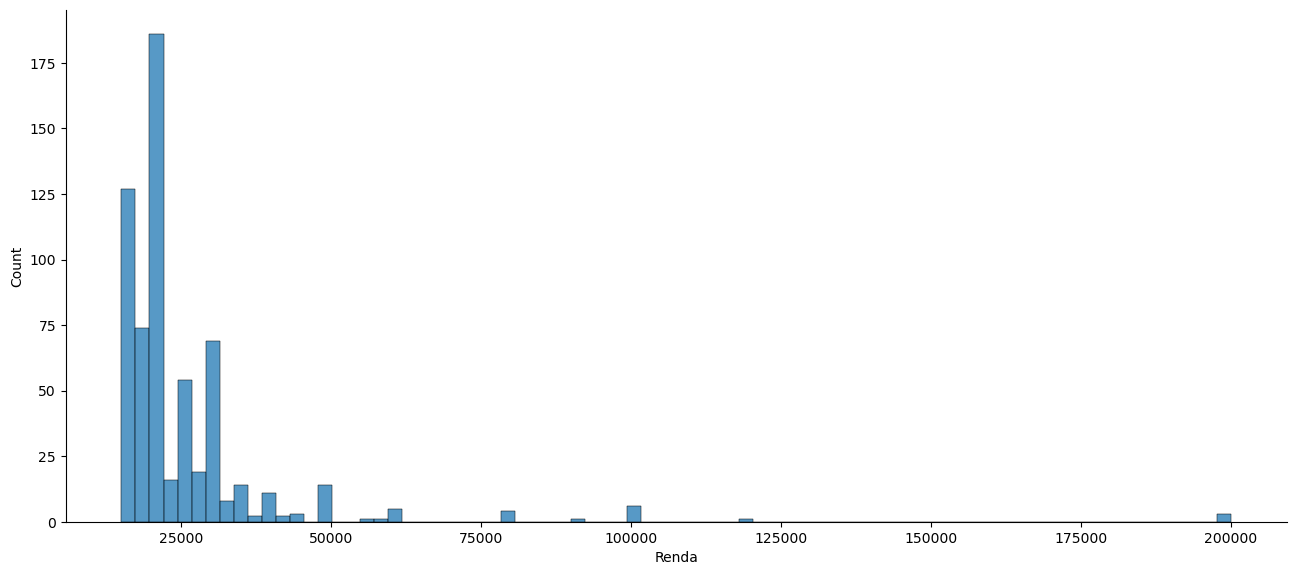

In [16]:
#verificando o grafico de distribuiçao nde renda com Seaborn
#necessario filtrar a renda,pois o grafico gerado sera muito extenso
#ax=sns.displot(df.Renda)
ax=sns.displot(df.query('Renda>15000').Renda)
ax.figure.set_size_inches(15,6)
plt.show()

#podemos ver nesse grafico uma assimetria a esquerda

In [23]:
#calculando a media da Renda
#o valor retornado corresponda ao salario minimo
media=df.Renda.mean()
print(round(media,2))

#calculando a mediana
mediana=df.Renda.median()
print(mediana)

#calculando a moda
#o valor retornado corresponde ao salario minimo
moda=df.Renda.mode()[0]
print(moda)

#podemos ver que a moda é menor que a mediana e a mediana é menor que media
#isso caracteriza uma uma assimetria a direita,como pode ser visto no grafico
print(moda < mediana < media)

2000.38
1200.0
788
True


In [25]:
#Verificando o grafico de distribuiçao da Altura comk Seaborn

#calculando a media da Altura
media=df.Altura.mean()
print(media)

#calculando a mediana
mediana=df.Altura.median()
print(mediana)

1.6995124540575812
1.6993247325


In [27]:
#Calculando a moda
moda=df.Altura.mode()
#podemos ver que a altura é multimodal
print('\n',moda)


 0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
Name: Altura, dtype: float64


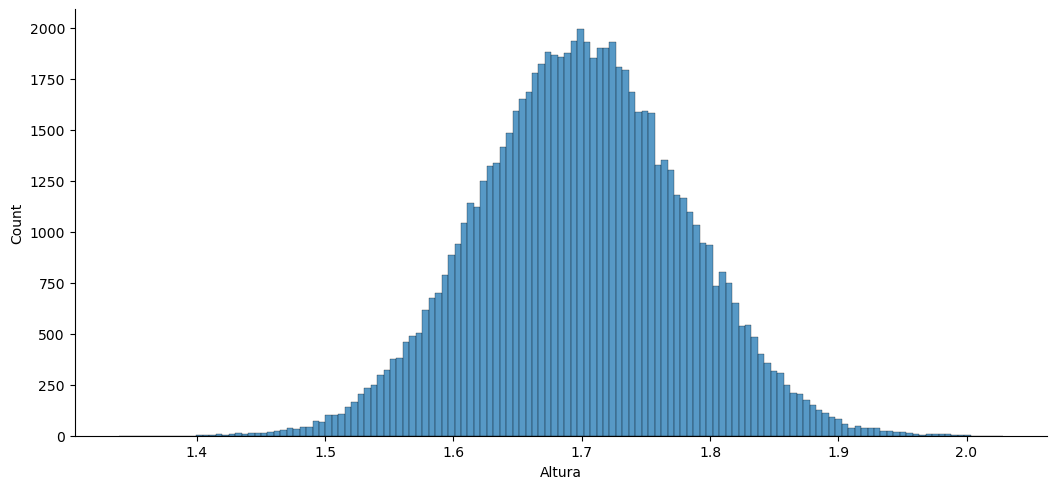

In [29]:
#podemos observar que os valores das 3 variaveis sao proximas,
#assim teremos um grafico simetrico

ax=sns.displot(df.Altura)
ax.figure.set_size_inches(12,5)
plt.show()

### Medidas Separatrizes

In [34]:
df=pd.read_csv('https://softgraf.com/cursodatascience/ibge-pesquisa-nacional-por-amostra-de-domicilios-2015.csv')
df

#retorna a mediana
m=df.Renda.quantile(q=0.5)
print(m)

#calcula os quartis
q=df.Renda.quantile([0.25,0.5,0.75])
print(q)

1200.0
0.25     788.0
0.50    1200.0
0.75    2000.0
Name: Renda, dtype: float64


### Boxplot

Primeiro quartil: 21.0
Segundo quartil: 22.0
Terceiro quartil: 23.0
Minimo: 18.0
Maximo: 26.0


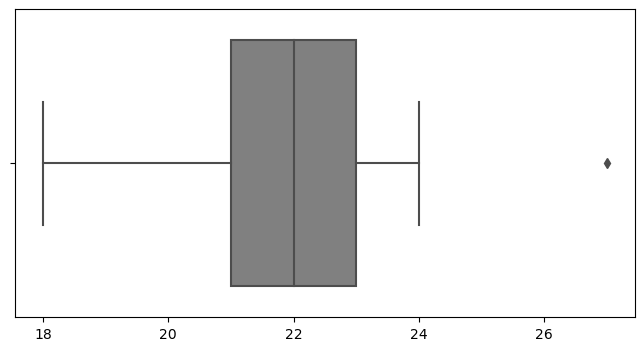

In [37]:
#Calculando o boxplot
idades=21,22,24,18,19,27,22,22,23,21,23,21
serie=pd.Series(idades)
quartis=serie.quantile([0.25,0.5,0.75])

q1=quartis[0.25]
print('Primeiro quartil:',q1)

q2=quartis[0.5]
print('Segundo quartil:',q2)

q3=quartis[0.75]
print('Terceiro quartil:',q3)

minimo=q1-1.5*(q3-q1)
print('Minimo:',minimo)

maximo=q3+1.5*(q3-q1)
print('Maximo:',maximo)

#exibindo grafico
ax=sns.boxplot(x=serie,color='gray')
ax.figure.set_size_inches(8,4)
plt.show()